# ML Project - Tal Davidi 208871376

# Preprocessing

### Data load 

In [1]:
import pandas as pd

# Load the CSV file
file_path = 'דאטה תאונות דרכים.csv'
df = pd.read_csv(file_path, encoding='cp1255')
df = df[df['SHNAT_TEU'] >= 2022]


### First Check - Data Shape & Types

In [2]:
# Print the number of rows and columns
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}\n")

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:\n")
display(df.head())

# Check data types and non-null counts for each column
print("\nDataset info:\n")
df.info()



Number of rows: 19189, Number of columns: 44


First 5 rows of the dataset:



,PK_TEUNA_FIKT,SHNAT_TEU,SUG_DEREH,SEMEL_YISHUV,SEMEL_ZOMET,REHOV1_KVISH1,REHOV2_KVISH2,BAYIT_KM,X,Y,...,MAHOZ,NAFA,EZOR_TIVI,METROPOLIN,MAAMAD_MINIZIPALI,Ezor_Stat_Meuhad,igun_name,month,monthday,date
14,2022008023,2022,1,7900.0,0.0,360.0,273.0,NaN,186982.0,665154.0,...,4.0,42.0,422.0,132.0,0.0,79000724.0,מרכז דרך,5,28,28/05/2022
15,2022032499,2022,1,531.0,0.0,105.0,103.0,NaN,231439.0,751375.0,...,2.0,24.0,241.0,NaN,0.0,5310005.0,עיגון מדויק,12,21,21/12/2022
132,2022033511,2022,1,664.0,1.0,105.0,106.0,NaN,244256.0,771428.0,...,2.0,21.0,212.0,NaN,2.0,6640001.0,עיגון מדויק,1,8,08/01/2022
134,2022077324,2022,1,541.0,1.0,107.0,136.0,NaN,191890.0,715587.0,...,3.0,32.0,324.0,NaN,99.0,5410003.0,עיגון מדויק,4,27,27/04/2022
135,2022017059,2022,1,233.0,1.0,103.0,109.0,NaN,190606.0,694680.0,...,4.0,41.0,411.0,141.0,16.0,2330001.0,עיגון מדויק,7,24,24/07/2022



Dataset info:

<class 'pandas.core.frame.DataFrame'>
Index: 19189 entries, 14 to 287890
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PK_TEUNA_FIKT      19189 non-null  int64  
 1   SHNAT_TEU          19189 non-null  int64  
 2   SUG_DEREH          19189 non-null  int64  
 3   SEMEL_YISHUV       19188 non-null  float64
 4   SEMEL_ZOMET        8738 non-null   float64
 5   REHOV1_KVISH1      18433 non-null  float64
 6   REHOV2_KVISH2      12486 non-null  float64
 7   BAYIT_KM           9803 non-null   float64
 8   X                  19189 non-null  float64
 9   Y                  19189 non-null  float64
 10  num_nifgaim        19189 non-null  int64  
 11  KLE_REHEV_HUZNU    19189 non-null  int64  
 12  SUG_YOM            19189 non-null  int64  
 13  YOM_LAYLA          19189 non-null  int64  
 14  RAMZOR             8741 non-null   float64
 15  HUMRAT_TEUNA       19189 non-null  int64  
 16  SUG_TEUNA

### Data Cleaning – Handling Missing Values


In [3]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
 
print("\nPercentage of missing values per column:\n")
display(missing_percentage)


Percentage of missing values per column:



LO_HAZA              96.023764
MERHAK_EZEM          94.528115
SUG_EZEM             94.481213
KIVUN_HAZIYA         80.697274
MEKOM_HAZIYA         80.671218
OFEN_HAZIYA          78.711762
RAV_MASLUL           65.448955
SEMEL_ZOMET          54.463495
RAMZOR               54.447861
BAYIT_KM             48.913440
BAKARA               46.000313
REHOV2_KVISH2        34.931471
HAD_MASLUL           34.551045
MAAMAD_MINIZIPALI    34.551045
METROPOLIN           17.822711
MEHIRUT_MUTERET      11.845328
REHOV1_KVISH1         3.939757
SEMEL_YISHUV          0.005211
PK_TEUNA_FIKT         0.000000
MAHOZ                 0.000000
NAFA                  0.000000
PNE_KVISH             0.000000
Ezor_Stat_Meuhad      0.000000
igun_name             0.000000
month                 0.000000
monthday              0.000000
EZOR_TIVI             0.000000
ROHAV                 0.000000
MEZEG_AVIR            0.000000
TEURA                 0.000000
SIMUN_TIMRUR          0.000000
SHNAT_TEU             0.000000
TKINUT  


As a rule of thumb, I decided to drop columns with more than 50% missing values, except for the RAMZOR column, which will be handled later.
For columns with less than 5% missing values, I will remove the corresponding rows.

In [4]:
# Drop columns with more than 50% missing values, except 'RAMZOR'
columns_to_drop = missing_percentage[(missing_percentage > 50) & (missing_percentage.index != 'RAMZOR')].index

print("\nColumns with more than 50% missing values (to drop, excluding 'RAMZOR'):\n")
print(columns_to_drop)

df.drop(columns=columns_to_drop, inplace=True)

# Remove duplicate rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows.")

# Identify columns with less than 5% missing values
low_missing_columns = missing_percentage[missing_percentage < 5].index

# Remove rows with missing values in these columns
rows_to_drop = df[df[low_missing_columns].isnull().any(axis=1)].index
df.drop(index=rows_to_drop, inplace=True)

print(f"\nRemoved {len(rows_to_drop)} rows with missing values in columns with less than 5% missing data.")



Columns with more than 50% missing values (to drop, excluding 'RAMZOR'):

Index(['LO_HAZA', 'MERHAK_EZEM', 'SUG_EZEM', 'KIVUN_HAZIYA', 'MEKOM_HAZIYA',
       'OFEN_HAZIYA', 'RAV_MASLUL', 'SEMEL_ZOMET'],
      dtype='object')

Removed 0 duplicate rows.

Removed 757 rows with missing values in columns with less than 5% missing data.


In [5]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
 
print("\nPercentage of missing values per column:\n")
display(missing_percentage)


Percentage of missing values per column:



RAMZOR               52.739800
BAYIT_KM             46.831597
BAKARA               44.384766
MAAMAD_MINIZIPALI    35.904948
HAD_MASLUL           35.530599
REHOV2_KVISH2        32.264540
METROPOLIN           16.596137
MEHIRUT_MUTERET      10.628255
MAHOZ                 0.000000
TEURA                 0.000000
MEZEG_AVIR            0.000000
PNE_KVISH             0.000000
EZOR_TIVI             0.000000
NAFA                  0.000000
ROHAV                 0.000000
Ezor_Stat_Meuhad      0.000000
igun_name             0.000000
month                 0.000000
monthday              0.000000
SIMUN_TIMRUR          0.000000
PK_TEUNA_FIKT         0.000000
TKINUT                0.000000
SHNAT_TEU             0.000000
ZURAT_DEREH           0.000000
SUG_TEUNA             0.000000
HUMRAT_TEUNA          0.000000
YOM_LAYLA             0.000000
SUG_YOM               0.000000
KLE_REHEV_HUZNU       0.000000
num_nifgaim           0.000000
Y                     0.000000
X                     0.000000
REHOV1_K

#### Explanation for Removing Certain Columns
After reviewing the data, I decided to remove irrelevant columns of various types.

1. Columns with information that cannot be utilized.
2. Columns representing road or accident identification codes.
I removed these columns to avoid confusing the model.

Columns containing location information were removed because I am using the X and Y columns, which will predict accidents based on location and provide better spatial indicators than classifying roads.

In [6]:
df.drop(columns=['MAAMAD_MINIZIPALI'], inplace=True)
df.drop(columns=['METROPOLIN'], inplace=True)
df.drop(columns=['REHOV1_KVISH1'], inplace=True)
df.drop(columns=['REHOV2_KVISH2'], inplace=True)
df.drop(columns=['igun_name'], inplace=True)
df.drop(columns=['PK_TEUNA_FIKT'], inplace=True)
df.drop(columns=['SEMEL_YISHUV'], inplace=True)
df.drop(columns=['Ezor_Stat_Meuhad'], inplace=True)
df.drop(columns=['NAFA'], inplace=True)
df.drop(columns=['MAHOZ'], inplace=True)
df.drop(columns=['EZOR_TIVI'], inplace=True)
df.drop(columns=['BAYIT_KM'], inplace=True)

#### Handle - "לא ידוע"
The value "לא ידוע" (unknown) appears in several categorical columns in the codebook.
To ensure the process is accurate, I decided to replace "לא ידוע" with NaN.

In [7]:
import numpy as np

# Create lists for each unique value in column C
num_9 = ['RAMZOR', 'MEZEG_AVIR', 'PNE_KVISH', 'SUG_EZEM', 'MERHAK_EZEM', 'LO_HAZA', 'KIVUN_HAZIYA']
num_0 = ['MEHIRUT_MUTERET', 'TKINUT', 'ROHAV']
num_5 = ['SIMUN_TIMRUR']

# Map lists to the values that should be converted to NaN
value_mapping = {
    9: num_9,
    0: num_0,
    5: num_5
}

# Replace specified values with NaN in the relevant columns
for value, columns in value_mapping.items():
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace(value, np.nan)

In [8]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
 
print("\nPercentage of missing values per column:\n")
display(missing_percentage)


Percentage of missing values per column:



RAMZOR             55.669488
BAKARA             44.384766
HAD_MASLUL         35.530599
TKINUT             15.185547
SIMUN_TIMRUR       14.507378
MEZEG_AVIR         14.274089
ROHAV              13.639323
PNE_KVISH          11.545139
MEHIRUT_MUTERET    10.628255
monthday            0.000000
month               0.000000
TEURA               0.000000
SHNAT_TEU           0.000000
SUG_DEREH           0.000000
ZURAT_DEREH         0.000000
SUG_TEUNA           0.000000
HUMRAT_TEUNA        0.000000
YOM_LAYLA           0.000000
SUG_YOM             0.000000
KLE_REHEV_HUZNU     0.000000
num_nifgaim         0.000000
Y                   0.000000
X                   0.000000
date                0.000000
dtype: float64

### Type Conversion

#### Date

In [9]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Check for values that were not converted successfully (NaT - Not a Time)
invalid_dates = df[df['date'].isnull()]

if invalid_dates.empty:
    print("All dates converted successfully.")
else:
    print("Invalid dates found:\n")
    display(invalid_dates[['date']])


All dates converted successfully.


After an initial review of the data, alongside examining the codebook, I noticed that some columns are categorized as categorical in the codebook but are labeled as FLOAT in the dataset.
I converted the categorical columns with missing values to ensure that filling the missing values later will be more accurate and appropriate.

#### Category

In [10]:
# List of categorical columns by name
categorical_columns = [
    'RAMZOR', 'MEZEG_AVIR', 'PNE_KVISH', 'SUG_EZEM', 
    'MERHAK_EZEM', 'LO_HAZA', 'KIVUN_HAZIYA', 
    'MEHIRUT_MUTERET', 'TKINUT', 'ROHAV', 
    'SIMUN_TIMRUR', 'SUG_DEREH' , 'SUG_YOM',
    'YOM_LAYLA', 'HUMRAT_TEUNA','SUG_TEUNA',
    'ZURAT_DEREH' , 'TEURA' ,'BAKARA',
    'HAD_MASLUL' 
]

# Convert each column to 'category' type
for column in categorical_columns:
    if column in df.columns:
        df[column] = df[column].astype('category')

# Print the dtypes to verify
print(df.dtypes)


SHNAT_TEU                   int64
SUG_DEREH                category
X                         float64
Y                         float64
num_nifgaim                 int64
KLE_REHEV_HUZNU             int64
SUG_YOM                  category
YOM_LAYLA                category
RAMZOR                   category
HUMRAT_TEUNA             category
SUG_TEUNA                category
ZURAT_DEREH              category
HAD_MASLUL               category
MEHIRUT_MUTERET          category
TKINUT                   category
ROHAV                    category
SIMUN_TIMRUR             category
TEURA                    category
BAKARA                   category
MEZEG_AVIR               category
PNE_KVISH                category
month                       int64
monthday                    int64
date               datetime64[ns]
dtype: object


### Fill missing Values

In [11]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
 
print("\nPercentage of missing values per column:\n")
display(missing_percentage)


Percentage of missing values per column:



RAMZOR             55.669488
BAKARA             44.384766
HAD_MASLUL         35.530599
TKINUT             15.185547
SIMUN_TIMRUR       14.507378
MEZEG_AVIR         14.274089
ROHAV              13.639323
PNE_KVISH          11.545139
MEHIRUT_MUTERET    10.628255
monthday            0.000000
month               0.000000
TEURA               0.000000
SHNAT_TEU           0.000000
SUG_DEREH           0.000000
ZURAT_DEREH         0.000000
SUG_TEUNA           0.000000
HUMRAT_TEUNA        0.000000
YOM_LAYLA           0.000000
SUG_YOM             0.000000
KLE_REHEV_HUZNU     0.000000
num_nifgaim         0.000000
Y                   0.000000
X                   0.000000
date                0.000000
dtype: float64

In [12]:
df.drop(columns=['BAKARA'], inplace=True)
df.drop(columns=['HAD_MASLUL'], inplace=True)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#### RAMZOR

<Axes: xlabel='SUG_DEREH', ylabel='count'>

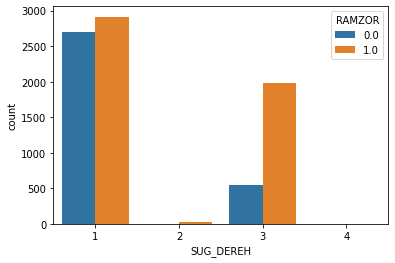

In [14]:
sns.countplot(data = df , x= 'SUG_DEREH' , hue = "RAMZOR" )

In [15]:
# Fill missing values with 0 for road types 2 and 4
df.loc[(df['SUG_DEREH'].isin([2, 4])) & (df['RAMZOR'].isna()), 'RAMZOR'] = 0

# Fill missing values with mode for road types 1 and 3
df.loc[(df['SUG_DEREH'].isin([1, 3])) & (df['RAMZOR'].isna()), 'RAMZOR'] = \
    df.groupby('SUG_DEREH',observed=False)['RAMZOR'].transform(lambda x: x.fillna(x.mode()[0]))


Road types 2 and 4 are in areas without intersections, so it is not logical for there to be a traffic light, and therefore we filled the value with 0.
Road types 1 and 3 represent urban or non-urban intersections, so we filled the missing values based on the most frequent value (mode) for each road type.

<Axes: xlabel='SUG_DEREH', ylabel='count'>

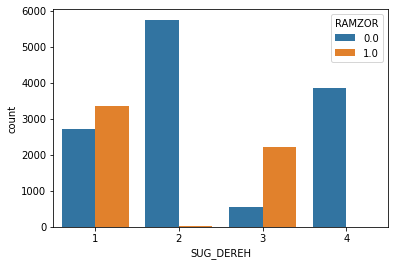

In [16]:
sns.countplot(data = df , x= 'SUG_DEREH' , hue = "RAMZOR" )

#### MEHIRUT_MUTERET

<Axes: xlabel='SUG_DEREH', ylabel='count'>

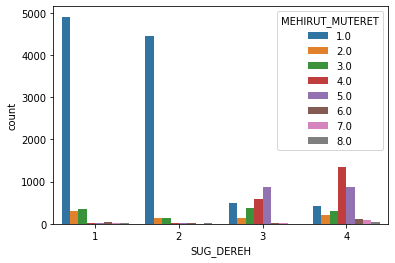

In [17]:
sns.countplot(data = df , x= 'SUG_DEREH' , hue = "MEHIRUT_MUTERET" )

In [18]:
# Fill missing values in MEHIRUT_MUTERET based on the most frequent value (mode) for each SUG_DEREH
#df['MEHIRUT_MUTERET'] = df.groupby('SUG_DEREH')['MEHIRUT_MUTERET'].transform(lambda x: x.fillna(x.mode()[0]))
df['MEHIRUT_MUTERET'] = df.groupby('SUG_DEREH', observed=False)['MEHIRUT_MUTERET'].transform(lambda x: x.fillna(x.mode()[0]))


<Axes: xlabel='SUG_DEREH', ylabel='count'>

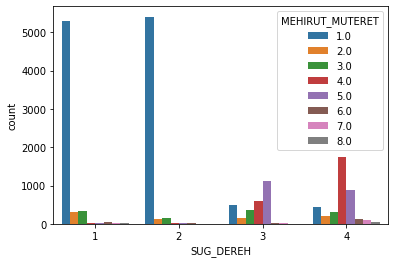

In [19]:
sns.countplot(data = df , x= 'SUG_DEREH' , hue = "MEHIRUT_MUTERET" )


#### Categorial Cols

In [20]:
# 1. Fill missing values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)
        print(f"{column} - Missing values filled with mode: {df[column].mode()[0]}")

# 2. Fill missing values in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)
        print(f"{column} - Missing values filled with median: {df[column].median()}")


TKINUT - Missing values filled with mode: 1.0
ROHAV - Missing values filled with mode: 3.0
SIMUN_TIMRUR - Missing values filled with mode: 3.0
MEZEG_AVIR - Missing values filled with mode: 1.0
PNE_KVISH - Missing values filled with mode: 1.0


C:\Users\talda\AppData\Local\Temp\ipykernel_43560\776993848.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)



These columns are unlikely to contribute significantly to the model and may introduce noise.
Columns with 30%-60% missing values – were imputed using the median (for numerical data) or mode (for categorical data).

The amount of missing data is reasonable, and these columns hold valuable information.
Columns with less than 30% missing values – were imputed directly to preserve as much original data as possible.

In [21]:
# Calculate and display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
 
print("\nPercentage of missing values per column:\n")
display(missing_percentage)


Percentage of missing values per column:



SHNAT_TEU          0.0
SUG_DEREH          0.0
monthday           0.0
month              0.0
PNE_KVISH          0.0
MEZEG_AVIR         0.0
TEURA              0.0
SIMUN_TIMRUR       0.0
ROHAV              0.0
TKINUT             0.0
MEHIRUT_MUTERET    0.0
ZURAT_DEREH        0.0
SUG_TEUNA          0.0
HUMRAT_TEUNA       0.0
RAMZOR             0.0
YOM_LAYLA          0.0
SUG_YOM            0.0
KLE_REHEV_HUZNU    0.0
num_nifgaim        0.0
Y                  0.0
X                  0.0
date               0.0
dtype: float64

### Feature Engineering

#### HUMRAT_TEUNA

Text(0.5, 1.0, 'Scatter Plot of Accidents By HUMRAT TEUNA')

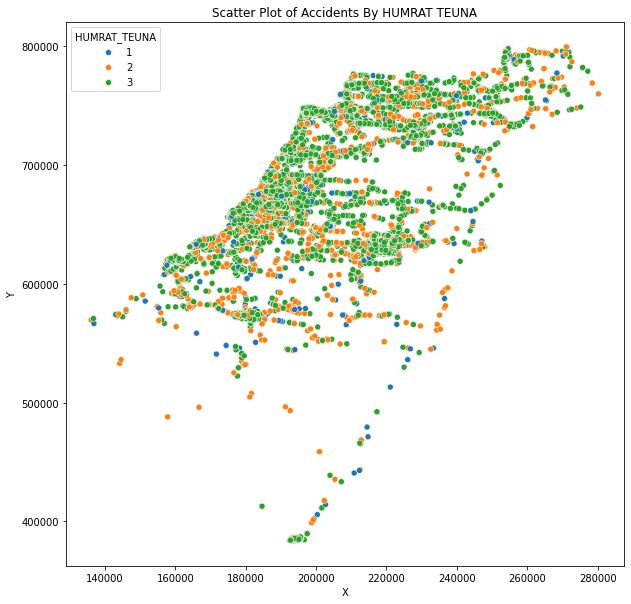

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = df , x='X', y='Y', hue = 'HUMRAT_TEUNA')
plt.title('Scatter Plot of Accidents By HUMRAT TEUNA')

1 TEUNA KASHA , 2 TEUNA KALA

In [23]:
df['HUMRAT_TEUNA'] = df['HUMRAT_TEUNA'].replace({1: 1, 2: 1, 3: 2})


C:\Users\talda\AppData\Local\Temp\ipykernel_43560\2192173339.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HUMRAT_TEUNA'] = df['HUMRAT_TEUNA'].replace({1: 1, 2: 1, 3: 2})


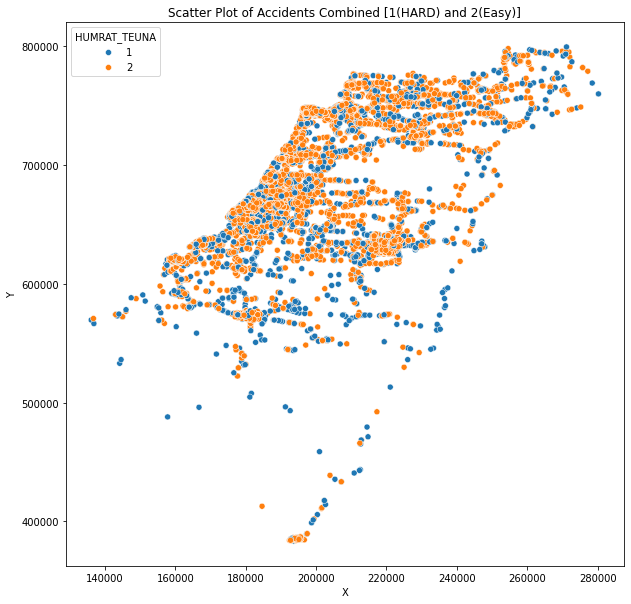

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='X', y='Y', hue='HUMRAT_TEUNA')
plt.title('Scatter Plot of Accidents Combined [1(HARD) and 2(Easy)]')
plt.show()


#### Dates

In [25]:
# Create new features from the date column
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df['date'].dt.month

# drop SHNAT_TEUNA because its the same with df.year
df.drop(columns=['SHNAT_TEU'], inplace=True)
df.drop(columns=['date'], inplace=True)

# Display the first five rows with the new features
display(df[['year', 'month', 'day_of_week']].head())


,year,month,day_of_week
14,2022,5,5
15,2022,12,2
132,2022,1,5
134,2022,4,2
135,2022,7,6


In [26]:

# 1. Create seasom and weekends
df['season'] = df['month'].apply(lambda x: (x % 12 + 3) // 3)
# {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 2. Define as category
df['season'] = df['season'].astype('category')
df['is_weekend'] = df['is_weekend'].astype('category')

# 3. Drop cols
df.drop(['month','monthday', 'day_of_week'], axis=1, inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18432 entries, 14 to 287881
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SUG_DEREH        18432 non-null  category
 1   X                18432 non-null  float64 
 2   Y                18432 non-null  float64 
 3   num_nifgaim      18432 non-null  int64   
 4   KLE_REHEV_HUZNU  18432 non-null  int64   
 5   SUG_YOM          18432 non-null  category
 6   YOM_LAYLA        18432 non-null  category
 7   RAMZOR           18432 non-null  category
 8   HUMRAT_TEUNA     18432 non-null  category
 9   SUG_TEUNA        18432 non-null  category
 10  ZURAT_DEREH      18432 non-null  category
 11  MEHIRUT_MUTERET  18432 non-null  category
 12  TKINUT           18432 non-null  category
 13  ROHAV            18432 non-null  category
 14  SIMUN_TIMRUR     18432 non-null  category
 15  TEURA            18432 non-null  category
 16  MEZEG_AVIR       18432 non-null  category
 

 {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

## EDA

#### Correlation Matrix

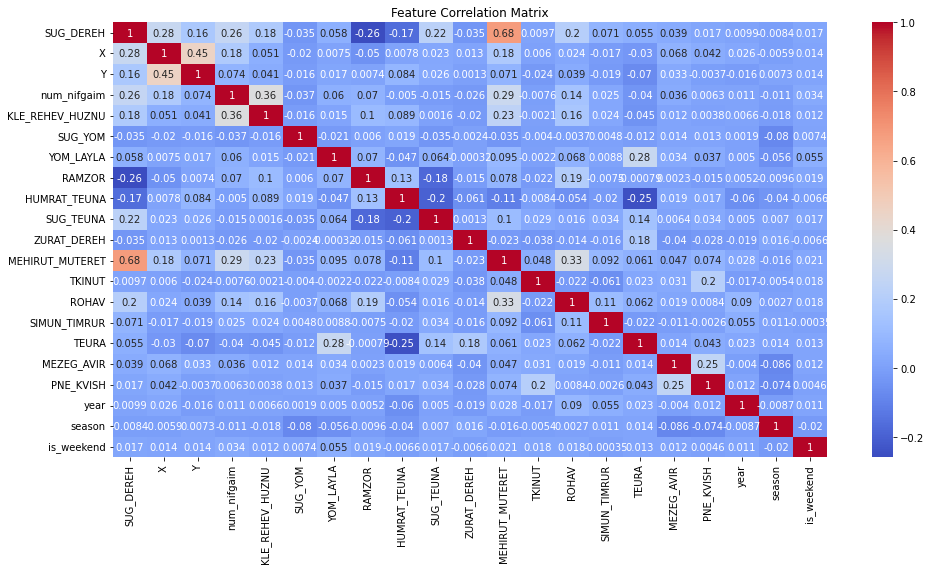

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


### Outliers

In [29]:
categorical_cols = ['SUG_DEREH', 'SUG_YOM', 'YOM_LAYLA', 'RAMZOR', 'HUMRAT_TEUNA', 
                    'SUG_TEUNA', 'ZURAT_DEREH', 'MEHIRUT_MUTERET', 'TKINUT', 
                    'ROHAV', 'SIMUN_TIMRUR', 'TEURA', 'MEZEG_AVIR', 'PNE_KVISH', 
                    'season', 'is_weekend']
numeric_columns = list(set(df.columns) - set(categorical_cols))


#### Numeric

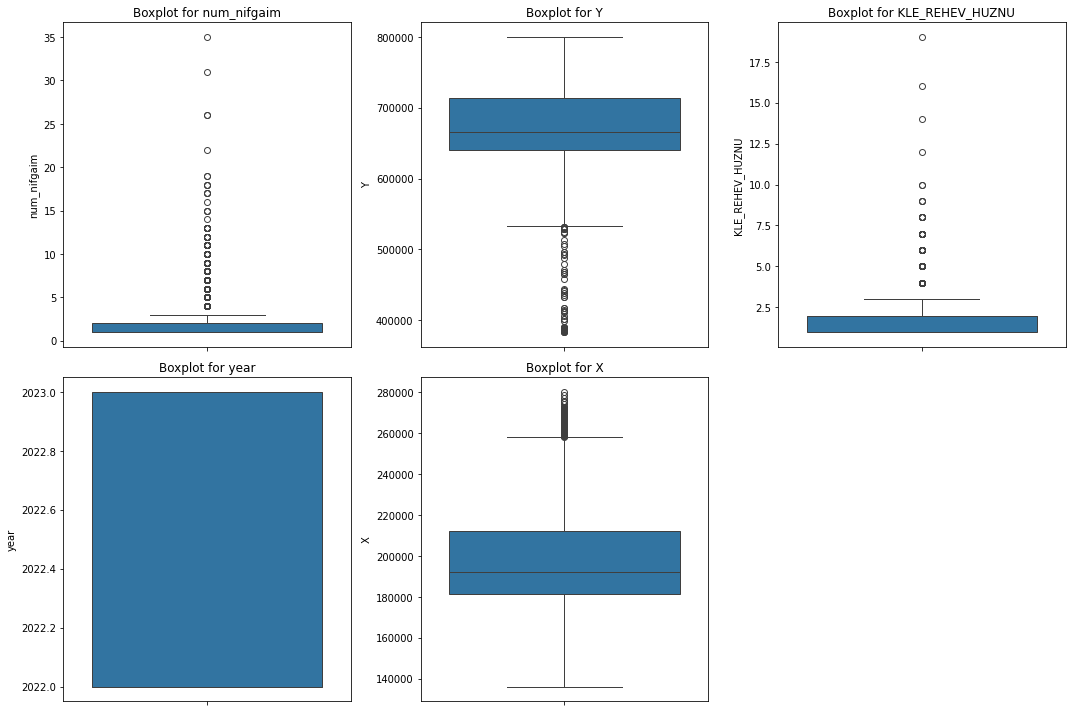

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# הגדרת מספר השורות והעמודות
num_cols = len(numeric_columns)
cols_per_row = 3  # מספר גרפים בכל שורה
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  # חישוב מספר השורות

plt.figure(figsize=(cols_per_row * 5, rows * 5))  # התאמת גודל הגרף לפי מספר השורות והעמודות

# לולאה להצגת בוקספלוט לכל עמודה בנפרד
for i, col in enumerate(numeric_columns):
    plt.subplot(rows, cols_per_row, i + 1)  # פריסת הגרפים
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)

plt.tight_layout()  # סידור הגרפים למניעת חפיפות
plt.show()



Although there are outliers in the X and Y coordinates,
I created a scatter plot to visualize if these outliers are within the borders of Israel.
It appears that they simply represent the edges of the country, such as the Golan Heights or Eilat.
Therefore, I choose to keep these values.

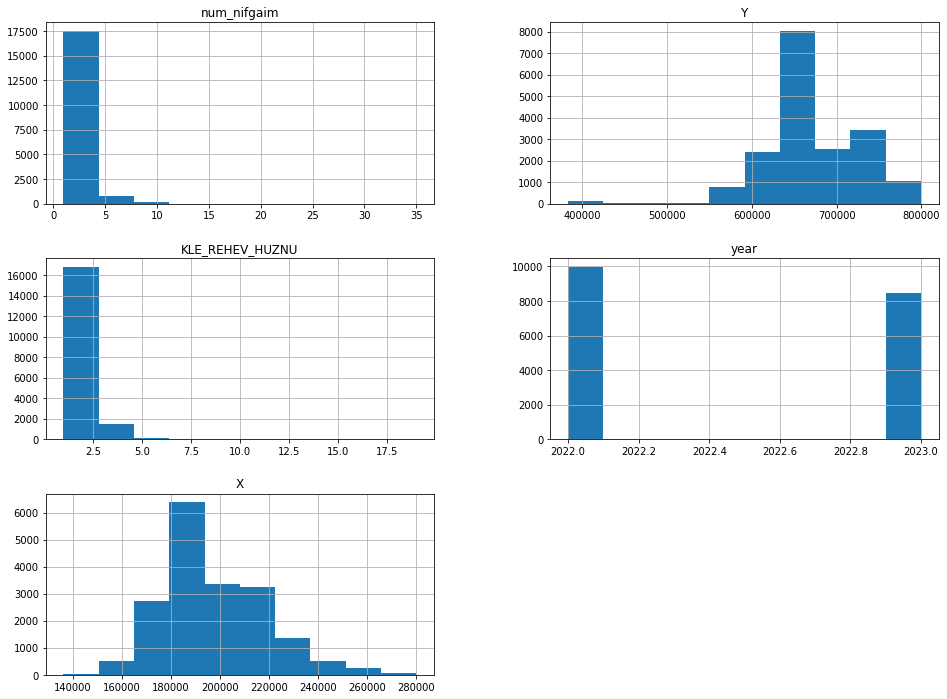

In [31]:
df[numeric_columns].hist(bins=10, figsize=(16, 12))
plt.show()

#### Category

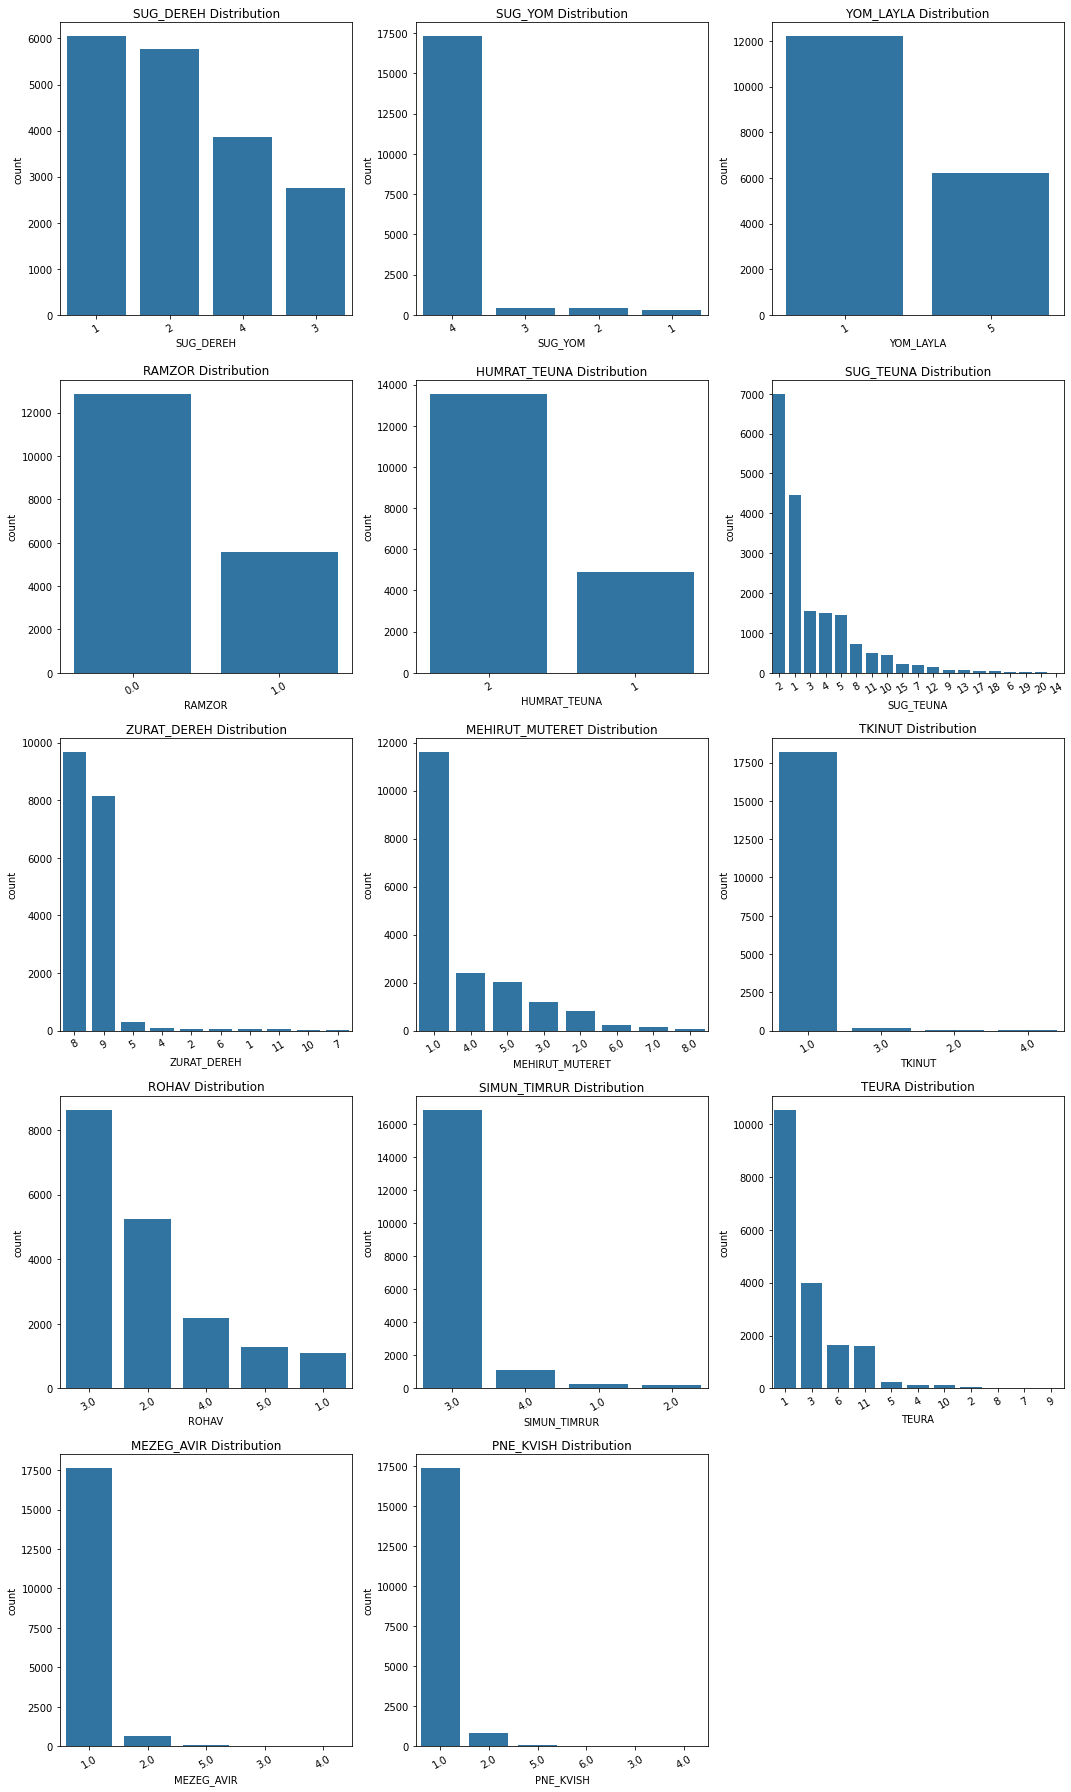

In [32]:
num_cols = len(categorical_columns)
rows = (num_cols // 3) + 1

plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(categorical_columns):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


#### Conclusions from the Graphs:
Speed Limit Distribution (MEHIRUT_MUTERET):

Most accidents occur on roads with low-speed limits (category 1).
There are fewer cases at higher speed limits (categories 4, 5), and very few cases at extreme speeds (categories 6-8).
The distribution is unbalanced, with the majority of accidents happening in low-speed areas.

Road Type Distribution (SUG_DEREH):

Road types 1 and 2 are the most common, with a similar number of cases.
Road type 3 (non-urban intersection) has the fewest cases.
Road type 4 falls in between but is still less frequent compared to types 1 and 2.
Key Insights:

The high occurrence of accidents on low-speed roads may suggest that urban traffic is denser and more accident-prone.
Fewer accidents at non-urban intersections (type 3) might be due to lower traffic volume in these areas.

#### Anomaly Detection

#### IQR for - "num_nifgaim", "KLE_REHEV_HUZNU"

Anomaly Counts:
 anomaly
 1    17510
-1      922
Name: count, dtype: int64


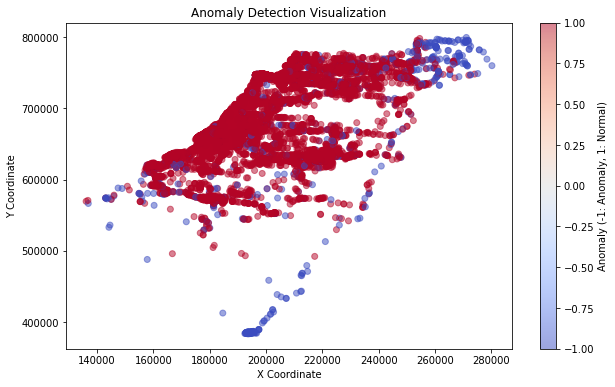

In [33]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Selecting numeric columns for anomaly detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initializing the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = isolation_forest.fit_predict(df[numeric_columns])

# Count anomalies and normal points
anomaly_counts = df['anomaly'].value_counts()
print("Anomaly Counts:\n", anomaly_counts)

# Scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Detection Visualization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Anomaly (-1: Anomaly, 1: Normal)')
plt.show()


In [34]:
# Define the columns to check for outliers
columns_to_check = ["num_nifgaim", "KLE_REHEV_HUZNU"]

# Initialize a dictionary to track removed rows per column
removed_rows = {}

# Adjusting the bounds for a wider range (5 * IQR) and removing outliers
for col in columns_to_check:
    initial_rows = df.shape[0]  # Number of rows before filtering
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Filter out rows with values outside the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Calculate the number of removed rows for the column
    removed_rows[col] = initial_rows - df.shape[0]

# Display the number of rows removed for each column
for col, removed in removed_rows.items():
    print(f"Rows removed due to outliers in {col}: {removed}")

# Display the cleaned data shape
print("Data after removing outliers:")
df.info()


Rows removed due to outliers in num_nifgaim: 172
Rows removed due to outliers in KLE_REHEV_HUZNU: 11
Data after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 14 to 287881
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SUG_DEREH        18249 non-null  category
 1   X                18249 non-null  float64 
 2   Y                18249 non-null  float64 
 3   num_nifgaim      18249 non-null  int64   
 4   KLE_REHEV_HUZNU  18249 non-null  int64   
 5   SUG_YOM          18249 non-null  category
 6   YOM_LAYLA        18249 non-null  category
 7   RAMZOR           18249 non-null  category
 8   HUMRAT_TEUNA     18249 non-null  category
 9   SUG_TEUNA        18249 non-null  category
 10  ZURAT_DEREH      18249 non-null  category
 11  MEHIRUT_MUTERET  18249 non-null  category
 12  TKINUT           18249 non-null  category
 13  ROHAV            18249 non-null  category
 14  SIMUN_

In [35]:
# Remove a column from the DataFrame
df.drop(columns=['anomaly'], inplace=True)

### Save to CSV

In [36]:
# Save the processed data to a CSV file
output_path = 'clean_data.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"Processed data saved to {output_path}")


Processed data saved to clean_data.csv


# Models

## Classification

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 14 to 287881
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SUG_DEREH        18249 non-null  category
 1   X                18249 non-null  float64 
 2   Y                18249 non-null  float64 
 3   num_nifgaim      18249 non-null  int64   
 4   KLE_REHEV_HUZNU  18249 non-null  int64   
 5   SUG_YOM          18249 non-null  category
 6   YOM_LAYLA        18249 non-null  category
 7   RAMZOR           18249 non-null  category
 8   HUMRAT_TEUNA     18249 non-null  category
 9   SUG_TEUNA        18249 non-null  category
 10  ZURAT_DEREH      18249 non-null  category
 11  MEHIRUT_MUTERET  18249 non-null  category
 12  TKINUT           18249 non-null  category
 13  ROHAV            18249 non-null  category
 14  SIMUN_TIMRUR     18249 non-null  category
 15  TEURA            18249 non-null  category
 16  MEZEG_AVIR       18249 non-null  category
 

#### Data Preparation and Model Training

In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# --- 1. Load Data ---
# Assuming `df` is the DataFrame containing your dataset
X = df.drop(['HUMRAT_TEUNA'], axis=1)
y = df['HUMRAT_TEUNA']

# Map target values
y = y.map({1: 0, 2: 1, 3: 2})

# --- 2. Separate numerical and categorical columns ---
categorical_cols = ['SUG_DEREH', 'SUG_YOM', 'YOM_LAYLA', 'RAMZOR', 
                    'SUG_TEUNA', 'ZURAT_DEREH', 'MEHIRUT_MUTERET', 'TKINUT', 
                    'ROHAV', 'SIMUN_TIMRUR', 'TEURA', 'MEZEG_AVIR', 'PNE_KVISH', 
                    'season', 'is_weekend']
numerical_cols = list(set(X.columns) - set(categorical_cols))

# --- 3. Preprocessing ---
# Preprocessor: scale numerical columns and one-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
    ]
)

# Preprocess data
X_preprocessed = preprocessor.fit_transform(X)

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# --- 5. Define models ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42),
    'SVM': SVC(kernel='rbf', class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# --- 6. Train and evaluate each model ---
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# --- 7. Results DataFrame ---
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0              XGBoost  0.786575   0.770908  0.786575  0.766082
1                  SVM  0.747397   0.765170  0.747397  0.754174
2        Random Forest  0.783562   0.769769  0.783562  0.753148
3                  KNN  0.755890   0.728923  0.755890  0.725711
4  Logistic Regression  0.700822   0.748930  0.700822  0.715185


### Visualize Model Performance Comparison

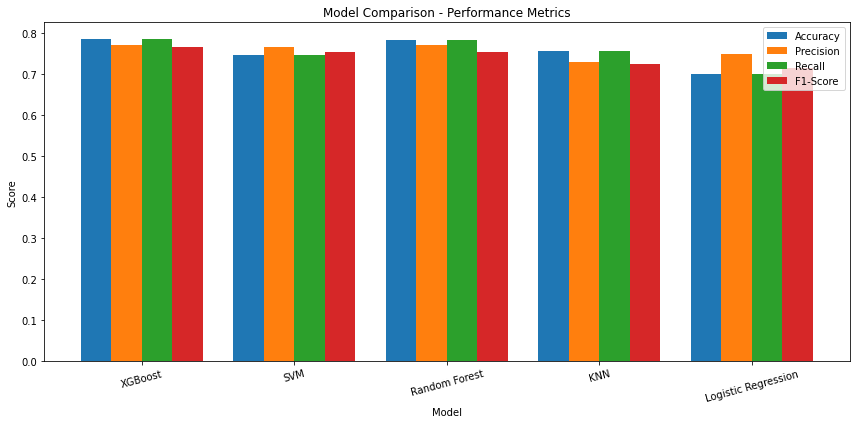

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(results_df))

# Plotting accuracy, precision, recall, and F1-score for each model
plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], results_df['Precision'], bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], results_df['Recall'], bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], results_df['F1-Score'], bar_width, label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison - Performance Metrics')
plt.xticks([i + 1.5 * bar_width for i in index], results_df['Model'], rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


### SHAP

C:\Users\talda\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [15:04:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


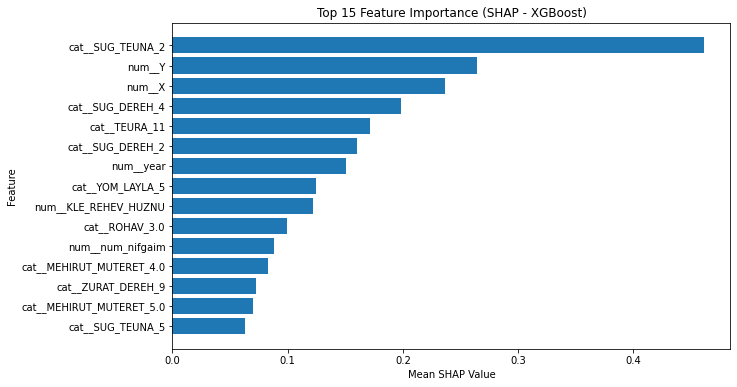

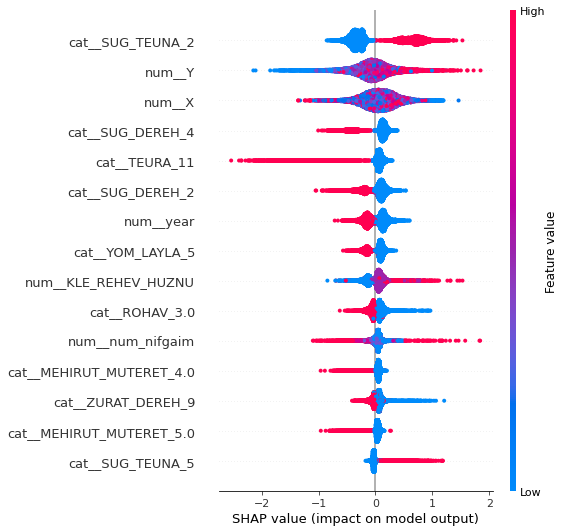

In [40]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Preprocessing ---
# הגדרת עמודות קטגוריאליות ונומריות
categorical_cols = ['SUG_DEREH', 'SUG_YOM', 'YOM_LAYLA', 'RAMZOR', 
                    'SUG_TEUNA', 'ZURAT_DEREH', 'MEHIRUT_MUTERET', 'TKINUT', 
                    'ROHAV', 'SIMUN_TIMRUR', 'TEURA', 'MEZEG_AVIR', 'PNE_KVISH', 
                    'season', 'is_weekend']
numerical_cols = list(set(X.columns) - set(categorical_cols))

# הגדרת ColumnTransformer לקידוד וסטנדרטיזציה
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # עמודות נומריות
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # עמודות קטגוריאליות
    ]
)

# קידוד וסטנדרטיזציה של הנתונים
X_preprocessed = preprocessor.fit_transform(X)

# המרת הנתונים לאחר קידוד ל-DataFrame עם שמות עמודות
X_encoded = pd.DataFrame(
    X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed,
    columns=preprocessor.get_feature_names_out()
)

# --- 2. Train-Test Split ---
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Train XGBoost Model ---
xgb_model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_enc, y_train_enc)

# --- 4. SHAP Analysis ---
# יצירת Explainer
explainer = shap.TreeExplainer(xgb_model)

# חישוב ערכי SHAP
shap_values = explainer.shap_values(X_train_enc)

# --- 5. סינון 15 הפיצ'רים המובילים ---
shap_summary = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mean SHAP Value': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean SHAP Value', ascending=False)

top_15_features = shap_summary.head(15)['Feature']

# --- 6. Visualization ---
# גרף ברים ל-15 הפיצ'רים המובילים
plt.figure(figsize=(10, 6))
plt.barh(shap_summary.head(15)['Feature'], shap_summary.head(15)['Mean SHAP Value'])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importance (SHAP - XGBoost)")
plt.xlabel("Mean SHAP Value")
plt.ylabel("Feature")
plt.show()

# גרף מפורט ל-15 הפיצ'רים המובילים
shap.summary_plot(shap_values, X_train_enc, feature_names=X_encoded.columns, max_display=15)


## Clustering 

### Data Loading and Preprocessing

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
'''
# Load the data
df = pd.read_csv('clean_data.csv')
df = df[df['year'] >= 2022]'''

# Select relevant columns for geospatial clustering
geo_data = df[['X', 'Y']]

# Display first few rows
display(geo_data.head())

# Scale X and Y coordinates
scaler = StandardScaler()
scaled_geo = scaler.fit_transform(geo_data)



,X,Y
14,186982.0,665154.0
15,231439.0,751375.0
132,244256.0,771428.0
134,191890.0,715587.0
135,190606.0,694680.0


## KMeans

### Elbow Method

  File "C:\Users\talda\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


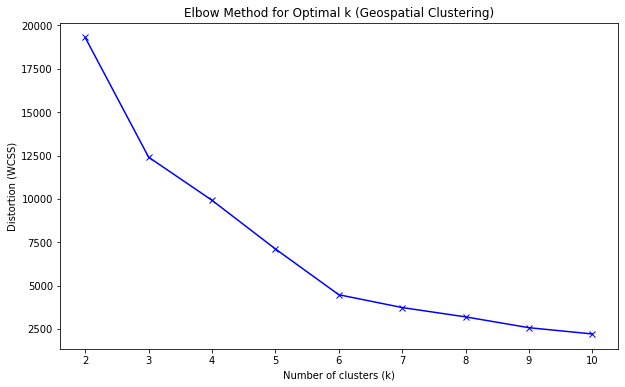

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='joblib')

distortions = []
K = range(2, 11)  # נבדוק עבור k מ-2 עד 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_geo)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (WCSS)')
plt.title('Elbow Method for Optimal k (Geospatial Clustering)')
plt.show()


### Run KMeans with k=4 (Based on Elbow Method)

In [43]:
from sklearn.cluster import KMeans

# Run KMeans with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
geo_clusters = kmeans.fit_predict(scaled_geo)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = geo_clusters


### Visualize KMeans Clustering Results

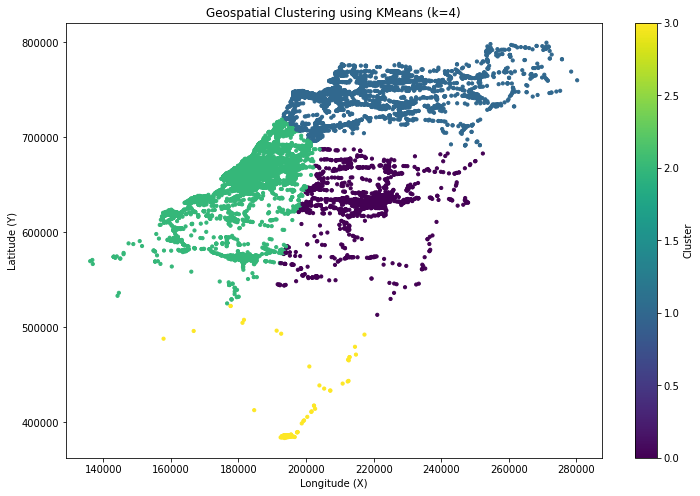

In [44]:
import matplotlib.pyplot as plt

# Visualize the clusters on the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['X'], df['Y'], c=df['KMeans_Cluster'], cmap='viridis', s=10)
plt.title('Geospatial Clustering using KMeans (k=4)')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.colorbar(label='Cluster')
plt.show()


## DBSCAN 

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of eps and min_samples values
eps_values = np.arange(0.2, 1.0, 0.1)  # Test eps between 0.2 to 1.0 in steps of 0.1
min_samples_values = range(5, 20, 5)  # Test min_samples between 5 and 20

best_score = -1
best_eps = None
best_min_samples = None

# Iterate over all combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_clusters = dbscan.fit_predict(scaled_geo)
        
        # Calculate Silhouette Score only if more than 1 cluster is found
        if len(set(db_clusters)) > 1:
            score = silhouette_score(scaled_geo, db_clusters)
            print(f"DBSCAN - eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.2f}")
            
            # Update best parameters if the score is higher
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"\nBest DBSCAN Result - eps: {best_eps:.2f}, min_samples: {best_min_samples}, Silhouette Score: {best_score:.2f}")


DBSCAN - eps: 0.20, min_samples: 5, Silhouette Score: 0.27
DBSCAN - eps: 0.20, min_samples: 10, Silhouette Score: 0.20
DBSCAN - eps: 0.20, min_samples: 15, Silhouette Score: 0.11
DBSCAN - eps: 0.30, min_samples: 5, Silhouette Score: 0.53
DBSCAN - eps: 0.30, min_samples: 10, Silhouette Score: 0.55
DBSCAN - eps: 0.30, min_samples: 15, Silhouette Score: 0.52
DBSCAN - eps: 0.40, min_samples: 5, Silhouette Score: 0.56
DBSCAN - eps: 0.40, min_samples: 10, Silhouette Score: 0.58
DBSCAN - eps: 0.40, min_samples: 15, Silhouette Score: 0.58
DBSCAN - eps: 0.50, min_samples: 5, Silhouette Score: 0.56
DBSCAN - eps: 0.50, min_samples: 10, Silhouette Score: 0.56
DBSCAN - eps: 0.50, min_samples: 15, Silhouette Score: 0.58
DBSCAN - eps: 0.60, min_samples: 5, Silhouette Score: 0.57
DBSCAN - eps: 0.60, min_samples: 10, Silhouette Score: 0.57
DBSCAN - eps: 0.60, min_samples: 15, Silhouette Score: 0.57
DBSCAN - eps: 0.70, min_samples: 5, Silhouette Score: 0.53
DBSCAN - eps: 0.70, min_samples: 10, Silhouett

In [46]:
# Run DBSCAN with the best parameters found
dbscan = DBSCAN(eps=0.5, min_samples=10)
db_clusters = dbscan.fit_predict(scaled_geo)

# Add the clusters to the DataFrame
df['DBSCAN_Cluster'] = db_clusters

# Calculate and print the final Silhouette Score
final_score = silhouette_score(scaled_geo, db_clusters)
print(f'Final Silhouette Score for DBSCAN (eps=0.5, min_samples=10): {final_score:.2f}')


Final Silhouette Score for DBSCAN (eps=0.5, min_samples=10): 0.56


### Visualize DBSCAN Clustering Results

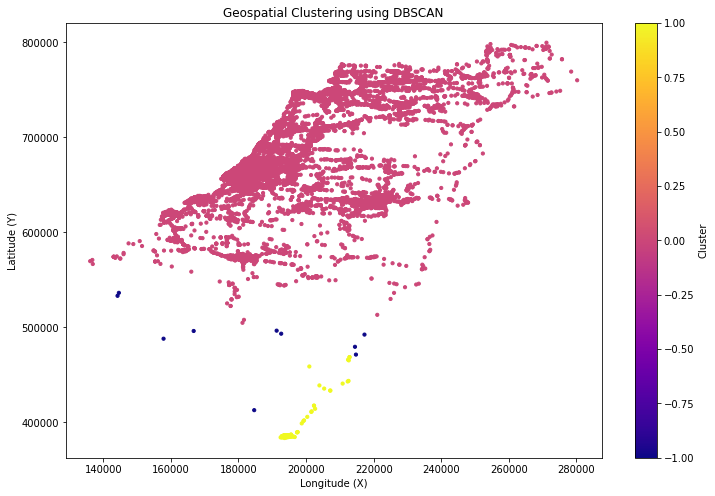

In [47]:
plt.figure(figsize=(12, 8))
plt.scatter(df['X'], df['Y'], c=df['DBSCAN_Cluster'], cmap='plasma', s=10)
plt.title('Geospatial Clustering using DBSCAN')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.colorbar(label='Cluster')
plt.show()


DBSCAN Results (Best Parameters: eps=0.4000000000000001, min_samples=15):
- Number of clusters: 2
- Number of noise points: 24


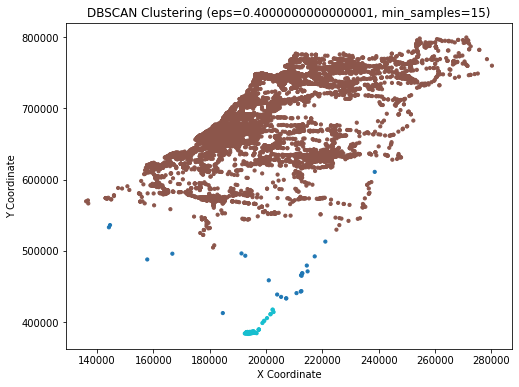

In [48]:
# Check if best_eps and best_min_samples have been defined
if 'best_eps' in locals() and 'best_min_samples' in locals():
    # Run DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(scaled_geo)

    # Count clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_noise = list(dbscan_labels).count(-1)

    print(f"DBSCAN Results (Best Parameters: eps={best_eps}, min_samples={best_min_samples}):")
    print(f"- Number of clusters: {dbscan_clusters}")
    print(f"- Number of noise points: {dbscan_noise}")

    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(geo_data['X'], geo_data['Y'], c=dbscan_labels, cmap='tab10', s=10)
    plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()
else:
    print("DBSCAN parameters (best_eps and best_min_samples) are not defined. Please ensure the parameter search is complete.")


## Hierarchical Clustering + Dendrogram

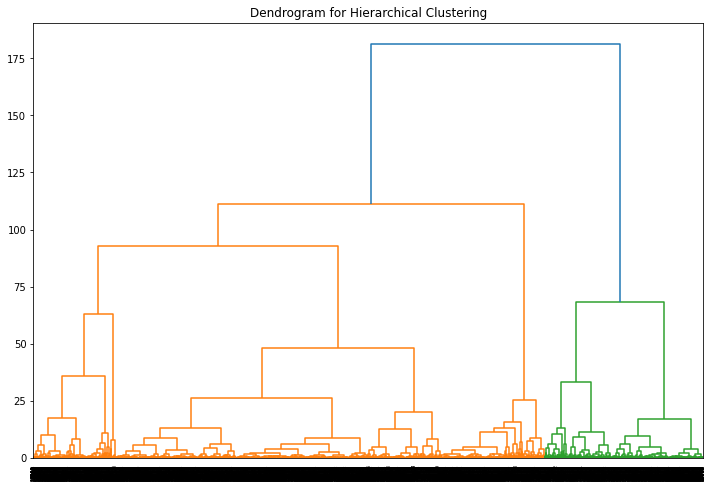

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering (ward method)
linked = linkage(scaled_geo, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Cut the dendrogram to obtain 4 clusters
df['Hierarchical_Cluster'] = fcluster(linked, t=4, criterion='maxclust')


## Evaluate Clustering Performance (Silhouette Score)

In [50]:
from sklearn.metrics import silhouette_score

# KMeans Silhouette Score
kmeans_score = silhouette_score(scaled_geo, df['KMeans_Cluster'])
print(f'Silhouette Score for KMeans (k=4): {kmeans_score:.2f}')

# DBSCAN Silhouette Score (only if more than 1 cluster is found)
if len(set(db_clusters)) > 1:
    dbscan_score = silhouette_score(scaled_geo, db_clusters)
    print(f'Silhouette Score for DBSCAN: {dbscan_score:.2f}')
else:
    print("DBSCAN identified one cluster or marked all data as noise.")

# Hierarchical Clustering Silhouette Score
hierarchical_score = silhouette_score(scaled_geo, df['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_score:.2f}')


Silhouette Score for KMeans (k=4): 0.56
Silhouette Score for DBSCAN: 0.56
Silhouette Score for Hierarchical Clustering: 0.53


#### Israel Map with Heatmap by "HUMRAT TEUNA"

In [51]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
from pyproj import CRS, Transformer

# Define CRS (Coordinate Reference Systems)
proj_from = CRS.from_epsg(2039)  # Israel TM Grid
proj_to = CRS.from_epsg(4326)    # WGS84 (Lat/Lon)

# Create a Transformer object
transformer = Transformer.from_crs(proj_from, proj_to, always_xy=True)

# Convert X, Y to Lat/Lon
def convert_coords(x, y):
    lon, lat = transformer.transform(x, y)
    return lat, lon

# Apply conversion to DataFrame
df[['lat', 'lon']] = df.apply(lambda row: convert_coords(row['X'], row['Y']), axis=1, result_type='expand')

# Filter out noise points (-1 in DBSCAN)
filtered_df = df[df['DBSCAN_Cluster'] != -1]

# Create base map centered on Israel
m = folium.Map(location=[31.5, 34.8], zoom_start=8)  

# Prepare data for Heatmap
heat_data = np.array(filtered_df[['lat', 'lon']].values)

# Check if heat_data has values to prevent errors
if len(heat_data) == 0:
    print("No data available for Heatmap.")
else:
    # Add Heatmap layer
    HeatMap(heat_data, radius=12, blur=10, max_zoom=10).add_to(m)

# Test point to verify map works
folium.Marker([31.5, 34.8], popup="Test Point").add_to(m)

# Display the map
m
